# **Prediction with Regression - House Price Prediction in King County using Single & Multivariate Linear Regression**



Monday, 18 April 2022

*Created by Ahmad Nafiys Ismail*

## Prediction with Python - Part 1

Dataset ini berisi harga jual rumah untuk King County, yang mencakup Seattle, USA. Data ini termasuk data penjualan rumah antara bulan Mei 2014 dan bulan Mei 2015.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


### 1 Importing dependencies

>Kita akan meng import software library yang diperlukan untuk sesi ini

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

### 2 Uploading the data into Jupyter notebook

>Kita akan meng upload file kc_house_data_NaN.csv dari cloud kedalam Jupyter notebook di google colabs ini

In [ ]:
file_name = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

dataf = pd.read_csv('/content/Course_2_Meeting in class 21-kc_house_data_NaN.csv')

In [ ]:
dataf = pd.read_csv('/content/Course_2_Meeting in class 21-kc_house_data_NaN.csv')

In [ ]:
# cek memanggil file yg sudah diupload 
dataf

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Sebagai alternatif, file kc_house_data_NaN.csv juga disertakan bersama dengan file ipynb, sehingga apabila tidak dapat men download langsung, dpt meng upload file tsb kedalam colabs via content maupun link ke google drive

### 3 Data Exploration

>Kita akan berusaha memahami dan memperoleh pengetahuan lebih banyak tentang data yang kita upload

In [ ]:
dataf # mengecek data yang sudah diupload

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
dataf.head(7) #memperlihatkan n baris awal dari sebuah pandas dataframe (default n = 5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [ ]:
dataf.tail(12) #memperlihatkan n baris akhir dari sebuah pandas dataframe (default n = 5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21601,21601,5100403806,20150407T000000,467000.0,3.0,2.50,1425,1179,3.0,0,...,8,1425,0,2008,0,98125,47.6963,-122.318,1285,1253
21602,21602,844000965,20140626T000000,224000.0,3.0,1.75,1500,11968,1.0,0,...,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
21603,21603,7852140040,20140825T000000,507250.0,3.0,2.50,2270,5536,2.0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,21604,9834201367,20150126T000000,429000.0,3.0,2.00,1490,1126,3.0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,21605,3448900210,20141014T000000,610685.0,4.0,2.50,2520,6023,2.0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,21606,7936000429,20150326T000000,1007500.0,4.0,3.50,3510,7200,2.0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,21607,2997800021,20150219T000000,475000.0,3.0,2.50,1310,1294,2.0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [ ]:
dataf.sample(5) # memanggil 5 sampel secara acak

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15029,15029,7212680020,20141219T000000,299500.0,3.0,1.75,1820,8813,2.0,0,...,7,1820,0,1994,0,98003,47.2622,-122.303,1780,7349
16472,16472,7905380080,20150226T000000,330000.0,5.0,2.50,2620,12763,1.0,0,...,7,1400,1220,1979,0,98034,47.7200,-122.213,2390,9156
5850,5850,3585900500,20150402T000000,1525000.0,4.0,4.25,4720,21000,3.0,0,...,11,4720,0,1971,0,98177,47.7591,-122.376,3010,20000
17661,17661,6929603207,20141210T000000,243500.0,4.0,2.00,1610,6200,1.0,0,...,7,1610,0,1979,0,98198,47.3833,-122.306,1610,7500
9765,9765,1775930140,20150505T000000,365000.0,3.0,1.75,1830,17349,1.0,0,...,8,1230,600,1977,0,98072,47.7427,-122.109,1840,11694


In [ ]:
dataf.columns #memperlihatkan nama kolom dari sebuah pandas dataframe

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
dataf.rename(columns={'Unnamed: 0':'number'}, inplace=True) # memastikan bahwa data yang sudah diganti tidak berubah

In [ ]:
dataf.columns #memperlihatkan nama kolom dari sebuah pandas dataframe

Index(['number', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
dataf.shape #shape adalah tuple yang memberikan informasi dimensi dari sebuah array

(21613, 22)

In [ ]:
dataf.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   number         21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [ ]:
dataf.dtypes #memperlihatkan data type untuk tiap field yang ada

number             int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# melihat summary statistics
dataf.describe() #describe() adalah sebuah metode dalam pandas dataframe yang digunakan untuk melakukan kalkulasi dari data statistic seperti percentile, mean, std, min, max dari serangkaian nilai numerik dari sebuah series atau dataframe

,number,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
dataf.isnull().sum() #isnull() adalah sebuah fungsi untuk mendeteksi missing values dalam serangkaian obyek. Sum() adalah fungsi untuk menjumlahkan

number            0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

Kita dapat melihat bahwa ada missing value pada kolom bedrooms dan bathrooms

In [ ]:
print("jumlah data NaN values pada kolom bedrooms :", dataf['bedrooms'].isnull().sum())
print("jumlah data NaN values pada kolom bathrooms :", dataf['bathrooms'].isnull().sum())

jumlah data NaN values pada kolom bedrooms : 13
jumlah data NaN values pada kolom bathrooms : 10


Kita akan mengganti missing values pada kolom 'bedrooms' dengan rata-rata dari kolom tsb menggunakan metode `replace()`. Jangan lupa untuk men set parameter inplace menjadi True

Impute Value = Memasukan nilai kepada dataframe yg NaN

In [ ]:
rerata = dataf['bedrooms'].mean() # mengganti missing value pada Bedroom dgn nilai mean tsb
dataf['bedrooms'].replace(np.nan,mean, inplace=True) # agar nilai mean tetap terapply pada fungsi selanjutnya

Kita juga akan mengganti missing values pada kolom 'bathrooms' dengan rata-rata dari kolom tsb menggunakan metode replace(). Jangan lupa untuk men set parameter inplace menjadi True

In [ ]:
rerata = dataf['bathrooms'].mean()
dataf['bathrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   number         21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  float64
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [ ]:
# melihat summary statistics yg baru
dataf.describe()

,number,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.116318,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926378,0.769293,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
print("jumlah data NaN values pada kolom bedrooms :", dataf['bedrooms'].isnull().sum())
print("jumlah data NaN values pada kolom bathrooms :", dataf['bathrooms'].isnull().sum())

jumlah data NaN values pada kolom bedrooms : 0
jumlah data NaN values pada kolom bathrooms : 0


Sekarang null value pada bedrooms dan bathrooms telah tiada

### 4 Data Analysis

Univariate Analysis = menganalisis hubungan 1 variabel feature (x) dengan variabel target (y)

In [ ]:
# memanggil kembali data teratas dan terbawah
df.head()


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.tail()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


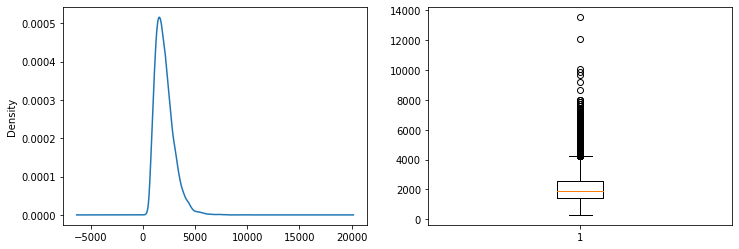

In [ ]:
# melakukan Univariate Analysis pada var sqft_living

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataf['sqft_living'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataf['sqft_living'])
plt.show()


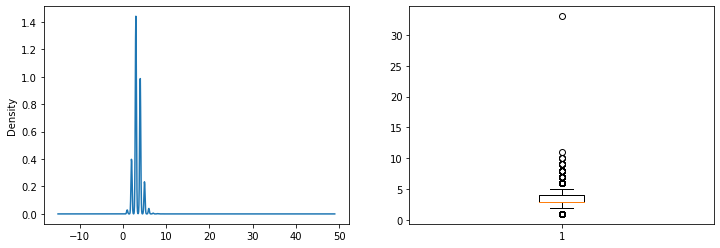

In [ ]:
# melakukan Univariate Analysis pada var sqft_living

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataf['bedrooms'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataf['bedrooms'])
plt.show()


Gunakan metode `value_counts` untuk menghitung jumlah dari rumah yang memiliki nilai lantai ('Floors') yang unik, kemudian metode `.to_frame()` untuk mengubahnya menjadi dataframe.

In [ ]:
 dataf.floors.value_counts().to_frame() # menampilkan urutan yg descending (besar - kecil)

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [ ]:
dataf.waterfront.value_counts().to_frame()

,waterfront
0,21450
1,163


Boxplot 

AxesSubplot(0.125,0.125;0.775x0.755)


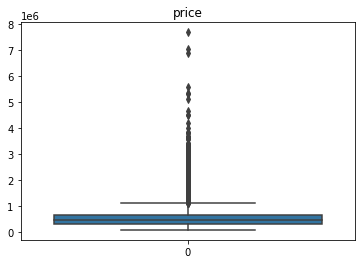

In [ ]:
#Membuat Boxplot (contoh pada data price)
plt.title("price")
print(sns.boxplot(data=dataf['price']))

AxesSubplot(0.125,0.125;0.775x0.755)


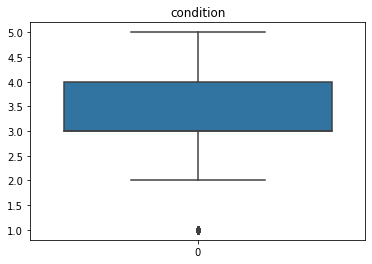

In [ ]:
#Membuat Boxplot (contoh pada data price)
plt.title("condition")
print(sns.boxplot(data=dataf['condition']))

AxesSubplot(0.125,0.125;0.775x0.755)


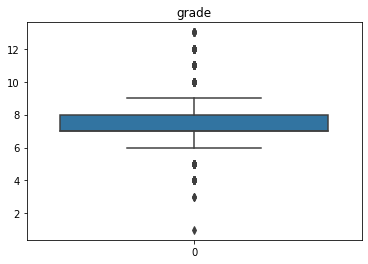

In [ ]:
#Membuat Boxplot (contoh pada data price)
plt.title("grade")
print(sns.boxplot(data=dataf['grade']))

Gunakan fungsi boxplot dalam seaborn library untuk menentukan apakah rumah dengan waterfront (atau tidak memiliki waterfront) memiliki lebih banyak price outliers.

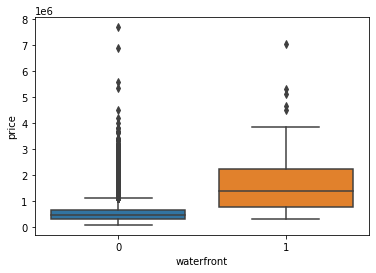

In [ ]:
# plotting boxplot - Waterfront
sns.boxplot(x='waterfront',y='price',data=dataf)

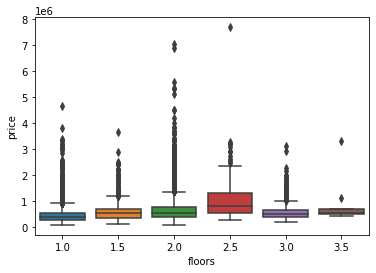

In [ ]:
# plotting boxplot - Flooers
sns.boxplot(x='floors',y='price',data=dataf)

Untuk mengatasi nilai yg masih terdapat Outlier, dilakukan 2 cara yaitu :

1.   Metode z-score
2.   Metode IQR



In [ ]:
# import statsmodels.api as sm
# from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Menghilangkan outlier - Metode Z-Score
dataf['z_score']=stats.zscore(dataf['price'])
dataf.drop(dataf.loc[dataf['z_score'].abs()>=1].index, inplace=True)
dataf.drop(['z_score'], axis=1, inplace=True)

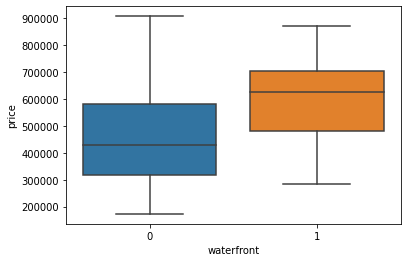

In [ ]:
# plotting boxplot - Floors
sns.boxplot(x='waterfront',y='price',data=dataf)

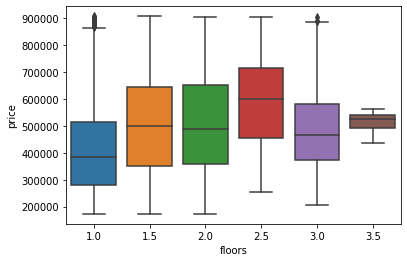

In [ ]:
# plotting boxplot - Floors
sns.boxplot(x='floors',y='price',data=dataf)

2. Metode IQR

In [ ]:
data_housing = dataf[['price']] # select data yang mengandung outlier

In [ ]:
#cari Q1, Q3, dan interquartile range
Q1 = data_housing.quantile(q=.25)
Q3 = data_housing.quantile(q=.75)
# IQR = Q3-Q1
IQR = data_housing.apply(stats.iqr) #IQR=Q3-Q1 atau bisa menggunakan stats.iqr dari scipy


In [ ]:
#ambil nilai antara 1.5*IQR dari Q1 dan Q3 aja
data_iqr = data_housing[~((data_housing < (Q1-1.5*IQR)) | (data_housing > (Q3+1.5*IQR))).any(axis=1)]

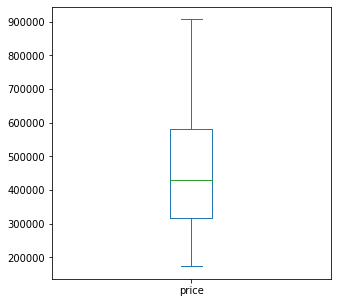

In [ ]:
# visualisasi
data_iqr.plot(kind='box', figsize=(5,5))
plt.show()

Gunakan fungsi `regplot` pada seaborn library untuk menentukan apakah fitur `sqft_above` berkorelasi negatif atau positif terhadap price.

(0.0, 975156.4306984884)

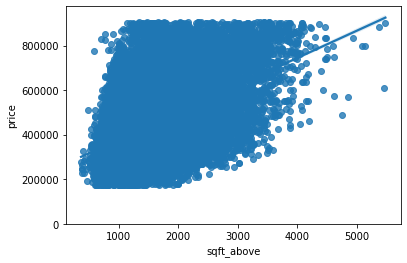

In [ ]:
sns.regplot(x=dataf["sqft_above"],y=dataf["price"],data=dataf)
plt.ylim(0,)

(0.0, 943700.0)

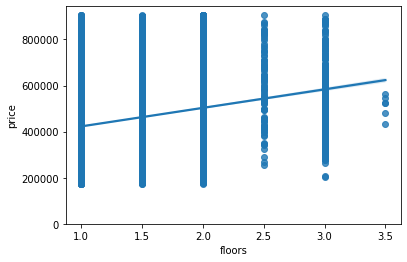

In [ ]:
sns.regplot(x=dataf["floors"],y=dataf["price"],data=dataf)
plt.ylim(0,)

Bivariate Analysis

In [ ]:
# melihat korelasi antar-variable secara ringkas
dataf.corr()

,number,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
number,1.000000,0.012488,0.027553,0.001287,0.110104,0.039565,-0.028669,0.186738,0.004119,-0.016177,...,0.088436,0.071416,-0.050629,0.199425,-0.025007,0.001474,-0.006089,0.008307,0.027087,-0.032372
id,0.012488,1.000000,0.022911,0.007266,0.030044,0.014331,-0.134644,0.032630,-0.000280,0.016904,...,0.041754,0.018828,-0.006301,0.028169,-0.019673,-0.004485,0.005235,0.021571,0.017973,-0.146323
price,0.027553,0.022911,1.000000,0.253867,0.393494,0.560767,0.088986,0.243259,0.038157,0.188312,...,0.575996,0.471310,0.207244,0.036654,0.069382,-0.004327,0.443453,0.080954,0.513531,0.080523
bedrooms,0.001287,0.007266,0.253867,1.000000,0.473810,0.581120,0.020040,0.135714,-0.037533,0.019519,...,0.286069,0.451585,0.277741,0.150965,-0.001815,-0.150240,-0.056419,0.142486,0.354696,0.017418
bathrooms,0.110104,0.030044,0.393494,0.473810,1.000000,0.694322,0.051532,0.493939,-0.022325,0.065058,...,0.583095,0.614227,0.204165,0.554421,0.011889,-0.216821,-0.050597,0.257429,0.501634,0.052328
sqft_living,0.039565,0.014331,0.560767,0.581120,0.694322,1.000000,0.149728,0.317194,-0.006294,0.135177,...,0.666961,0.839653,0.370976,0.349274,0.014188,-0.213132,-0.037935,0.296422,0.717869,0.164586
sqft_lot,-0.028669,-0.134644,0.088986,0.020040,0.051532,0.149728,1.000000,-0.025547,0.015163,0.089590,...,0.079509,0.153375,0.008260,0.034133,0.016454,-0.132142,-0.104580,0.221766,0.142657,0.711106
floors,0.186738,0.032630,0.243259,0.135714,0.493939,0.317194,-0.025547,1.000000,-0.012624,-0.023608,...,0.447645,0.520255,-0.316489,0.518986,-0.011359,-0.066192,0.014711,0.135514,0.251924,-0.029811
waterfront,0.004119,-0.000280,0.038157,-0.037533,-0.022325,-0.006294,0.015163,-0.012624,1.000000,0.295197,...,-0.020303,-0.014256,0.013003,-0.044244,0.057090,0.039795,-0.046387,-0.061068,0.001690,0.034228
view,-0.016177,0.016904,0.188312,0.019519,0.065058,0.135177,0.089590,-0.023608,0.295197,1.000000,...,0.100485,0.042690,0.171223,-0.070272,0.050652,0.102655,-0.044438,-0.076807,0.155771,0.086470


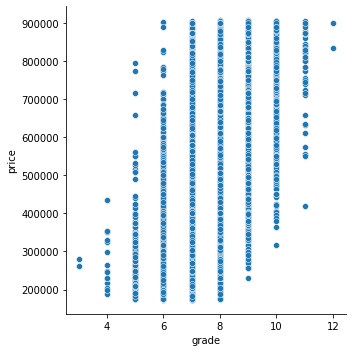

In [ ]:
#kita akan melakukan visualisasi terhadap data untuk melihat hubungan antara dua variabel
sns.relplot(x='grade', y='price', data=dataf) 

Kita dapat menggunakan metode corr() dari Pandas untuk menentukan fitur selain price yang paling berkorelasi dengan price.

In [ ]:
dataf.corr()['price'].sort_values().to_frame()

,price
zipcode,-0.004327
condition,0.022053
id,0.022911
number,0.027553
yr_built,0.036654
waterfront,0.038157
yr_renovated,0.069382
sqft_lot15,0.080523
long,0.080954
sqft_lot,0.088986


In [ ]:
features = dataf.drop('price', axis=1)
sns.heatmap(features.corr(), center=0);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


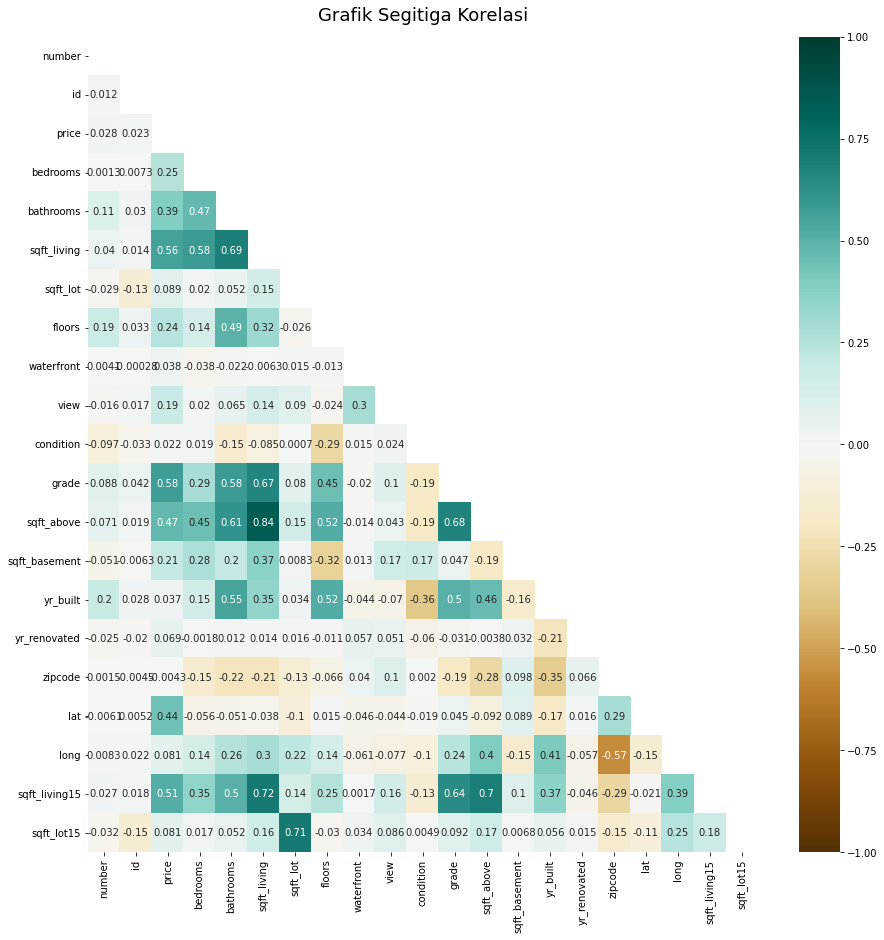

In [ ]:
# define the mask to set the values in the upper triangle to True
plt.figure(figsize=(15, 15))
mask = np.triu(np.ones_like(dataf.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataf.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Grafik Segitiga Korelasi', fontdict={'fontsize':18}, pad=16);


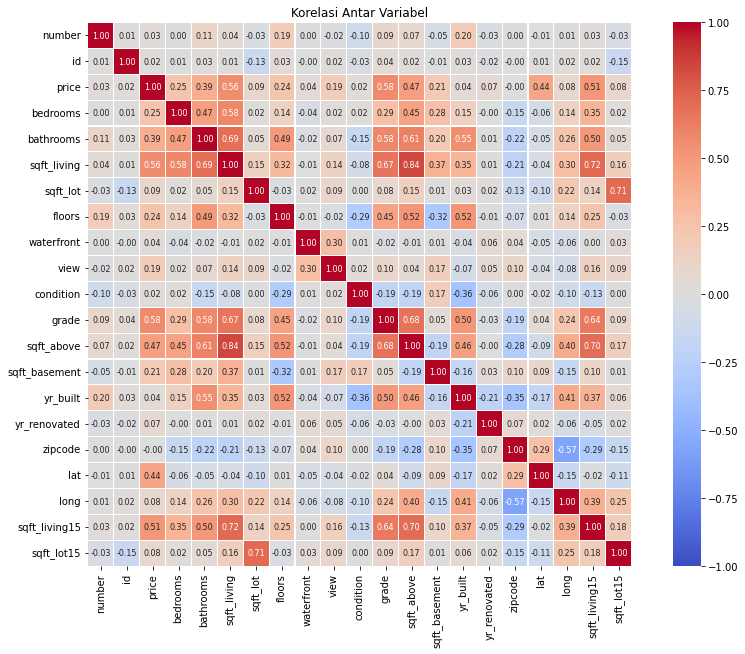

In [ ]:
# Fungsi Heatmap
corr = dataf.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, annot_kws={"size":8}, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()


##Prediction with Python - Part 2

### 5 Model Development

Persebaran Data

<Figure size 720x576 with 0 Axes>

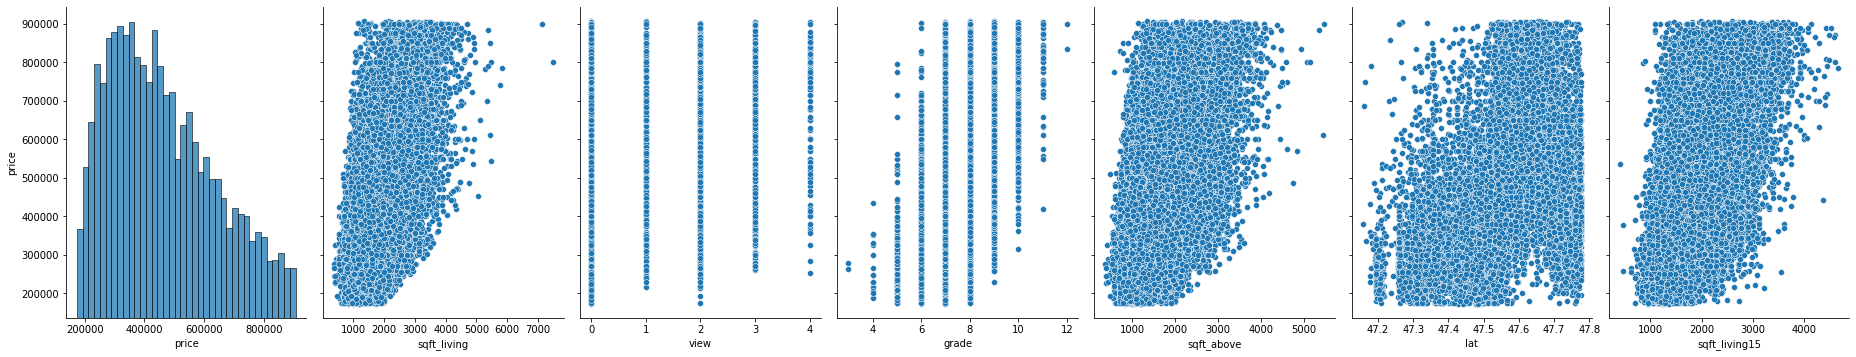

In [ ]:
# melihat persebaran data
plt.figure(figsize=(10,8))
sns.pairplot(data=dataf, x_vars=['price', 'sqft_living','view', 'grade', 'sqft_above', 'lat','sqft_living15'], y_vars=['price'], height=5, aspect=0.75)

In [ ]:
# variabel independent
X = dataf.iloc[:, 1:].values
# Variabel Dependent
y = dataf.iloc[:, :1].values

In [ ]:
# Prepare data training & data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1275, random_state = 0)

Data-train akan digunakan untuk memberi data kepada machine learning, sedangkan data-test untuk menilai hasil dari model machine learning. Ukuran dari data-test dapat disesuaikan banyaknya data. Random state adalah cara mesin memilih data untuk dimasukkan ke data-train dan data-test.

In [ ]:
# Model regresi linear
line = LinearRegression()
line.fit(X_train, y_train)

# Memasukkan nilai prediksi dari data-test
y_pred = line.predict(X_test)

In [ ]:
# Memasukkan nilai konstanta pada model
X = sm.add_constant(X)

# Mencetak hasil regresi dan penilaian model
model = sm.OLS(y, X).fit()
print(model.summary())
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
print('Model Score: ', line.score(np.array(X_test), y_test))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2967.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:19:29   Log-Likelihood:            -2.5053e+05
No. Observations:               19214   AIC:                         5.011e+05
Df Residuals:                   19203   BIC:                         5.012e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.665e+07   2.75e+05    -97.075

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


**R-squared** merupakan angka yang berkisar antara 0–1 yang mengindikasikan besarnya pengaruh variabel independen kepada variabel dependen. Semakin mendekati angka satu, model yang dibentuk akan semakin baik.

Jika model score bernilai > 0.5 , maka dapat diasumsikan model dari Testing Data sudah cukup akurat

In [ ]:
def MAPE(y_test,y_pred): # mean abs percentage error
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape
# Prediksi pada data-test
LR_Test_predict = line.predict(X_test) 
 
# Menghitung nilai MAPE
LR_MAPE= MAPE(y_test,LR_Test_predict)
print("MAPE: ",LR_MAPE)
# nilai MAPE =  19.570005292086247% 

MAPE:  19.570005292086247


Visualisasi Hasil Analisis Regresi Linear

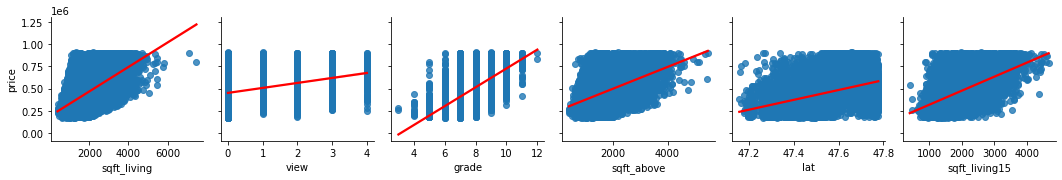

In [ ]:
# membuat grafik visualisasi reg linear
sns.pairplot(dataf, x_vars=['sqft_living', 'view', 'grade', 'sqft_above', 'lat', 'sqft_living15'], y_vars=['price'], kind='reg', plot_kws={'line_kws':{'color':'red'}})

Dari pairplot, dapat dilihat bahwa grade sangat mempengaruhi harga dari sebuah rumah. Selain itu, faktor lainnya seperti luas interior rumah, pemandangan rumah, luas rumah, letak lintang, dan luas rumah dari 15 tetangga terdekat juga cukup mempengaruhi harga sebuah rumah di King County

In [ ]:
# prediksi harga rumah (contoh)
np.set_printoptions(precision=3)
print("Prediksi Harga Rumah April 2022: ",
line.predict([[11500, 0, 5, 1130, 47.5316, 2110, 1, 1, 1, 1, 1, 1]])) 
# variable ['sqft_living', 'view', 'grade', 'sqft_above', 'lat', 'sqft_living15']


Prediksi Harga Rumah April 2022:  [6.099e+08]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


*Source Method II*

Kita dapat memakai model linear regression menggunakan fitur 'long' dan menghitung R^2.

In [ ]:
# impor modul Sckit-Learn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = dataf[['long']]
Y = dataf['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.0065536199116238425

In [ ]:
X = dataf[['lat']]
Y = dataf['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.1966508099268096

Gunakan model linear regression untuk memprediksi 'price' dengan menggunakan fitur `sqft_living` kemudian hitung R^2. 

In [ ]:
x = dataf[['sqft_living']]
y = dataf.price
lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.3144601348455436

Gunakan model linear regression untuk memprediksi 'price' menggunakan daftar fitur sbb:

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Kemudian hitung R^2. 

In [ ]:
x = dataf[features]
y = dataf.price
lr.fit(x,y)
lr.score(x,y)

0.6070599043810166

>Buatlah list of tuples, dengan elemen pertama dari tuple berisikan nama dari estimator: 
>>'scale'

>>'polynomial'

>>'model'

>Dan elemen kedua dari tuple berisi model constructor

>>StandardScaler()

>>PolynomialFeatures(include_bias=False)

>>LinearRegression()

In [ ]:
Input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Gunakan list tsb untuk membuat pipeline object untuk memprediksi 'price', fit object tsb menggunakan features di dalam list features, dan hitung R^2.

In [ ]:
x=dataf[features]
y=dataf.price
pipe=Pipeline(Input)
pipe.fit(x,y)
pipe.score(x,y)

0.6563192578437982

### 6 Model Evaluation and Refinement

Impor modules yang diperlukan:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Kita akan membagi data menjadi training dan testing sets: 

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = dataf[features]
Y = dataf['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 2883
number of training samples: 16331


Buatlah Ridge regression object menggunakan training data, set  regularization parameter menjadi 0.1, dan hitung R^2 menggunakan test data.

In [ ]:
from sklearn.linear_model import Ridge

Linear least squares dengan l2 regularization.

Model ini merupakan solusi regression model dimana loss function merupakan fungsi linear least square dan regularization ditentukan oleh l2-norm. Yang juga dikenal sebagai Ridge Regression or Tikhonov regularization. Estimator ini memiliki built-in support untuk multi-variate regression (i.e., saat y merupakan 2d-array dari shape [n_samples, n_targets]).

In [ ]:
rm=Ridge(alpha=0.1) # nilai confidence level 0.99
rm.fit(x_train,y_train)
rm.score(x_test,y_test)

0.6022414688375253

Lakukan transformasi second order polynomial pada training data dan testing data. Buatlah Ridge regression object menggunakan training data, set regularisation parameter menjadi 0.1, dan hitung R^2 menggunakan test data yang ada. 

In [ ]:
pr=PolynomialFeatures(degree=2) #second order polynomial
x_train_pr=pr.fit_transform(x_train) #train data
x_test_pr=pr.fit_transform(x_test) #test data

rr=Ridge(alpha=0.1) #Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.
rr.fit(x_train_pr,y_train)
rr.score(x_test_pr,y_test)

0.6130538369213189

# Multiple Linear Regression

In [ ]:
import statsmodels.api as sm

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
dataf = pd.read_csv('/content/Course_2_Meeting in class 21-kc_house_data_NaN.csv')

In [ ]:
#Recall data kita
dataf

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# dataf = pd.read_csv('/content/Course_2_Meeting in class 21-kc_house_data_NaN.csv').sample(10000, random_state=42)

In [ ]:
dataf.tail()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
#Pertama, buat variabel x dan y
x = dataf.drop(columns='price')
y = dataf['price']

In [ ]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [ ]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 21)
(17290,)
(4323, 21)
(4323,)


In [ ]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [ ]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

ValueError: ignored

In [ ]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

AttributeError: ignored

In [ ]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

ValueError: ignored

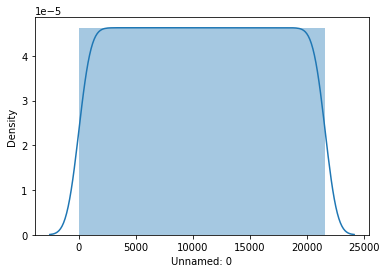

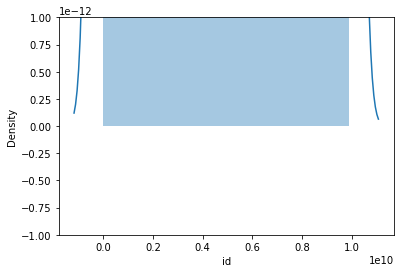

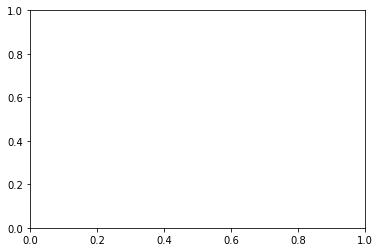

In [ ]:
#View distribution plots for all columns
for col in dataf.columns:
    plt.subplots(1, 1)
    sns.distplot(dataf[col])

In [ ]:
linreg = LinearRegression()
#Split features and target
X = dataf.drop(columns=['price'], axis=1)
y = dataf.price
#Utilize cross validation to determine baseline score
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))
from itertools import combinations
interactions = []
feat_combinations = combinations(X.columns, 2)
data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(linreg, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 5 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:10])

NameError: ignored

# Reference 
1) Adipta Martulandi - Multivariate Linear Regression

https://github.com/adiptamartulandi/Multivariate-Linear-Regression/blob/master/Adipta%20Martulandi%20-%20Multivariate%20Linear%20Regression.ipynb

2) Multiple Linear Regression in Python: King County Housing Data

https://medium.com/swlh/multiple-linear-regression-in-python-king-county-housing-data-beef1c3982a1